In [1]:
'''It is decision of "Titanik" from Kaggle: "https://www.kaggle.com/competitions/titanic".'''

'It is decision of "Titanik" from Kaggle: "https://www.kaggle.com/competitions/titanic".'

In [2]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from functions_for_titanik import inpute_data, make_prediction_file

In [3]:
#Path to data

PATH_TO_TRAIN = "kaggle_data/train.csv"
PATH_TO_TEST = "kaggle_data/test.csv"

In [4]:
#Loading data

train = pd.read_csv(PATH_TO_TRAIN, index_col="PassengerId") # Training sample
test = pd.read_csv(PATH_TO_TEST, index_col="PassengerId")   # Test sample

In [5]:
#Checking the data status #1
print("train:")
train.info()
print(" \ntest:")
test.info()

train:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
 
test:
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       33

In [6]:
#Drop useless columns

useless_columns = ["Name", "Ticket", "Cabin"] #There is very little data in the "Cabin"

train_clean = train.drop(columns=useless_columns)
test_clean = test.drop(columns=useless_columns)

In [7]:
#Inputing NaN data

train_full = inpute_data(train_clean)
test_full = inpute_data(test_clean)

In [8]:
#Checking the data status #2
print("train_full:")
train_full.info()
print(" \ntest_full:")
test_full.info()

train_full:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB
 
test_full:
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Emba

c:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


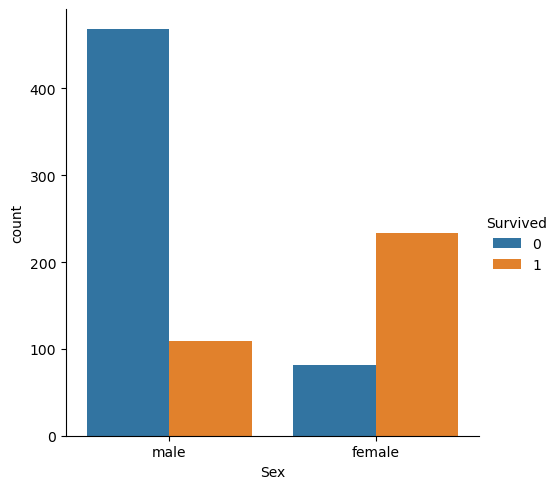

In [9]:
#Data visualization

sns.catplot(data=train_full, x="Sex", hue="Survived", kind="count") #Men die more often

c:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


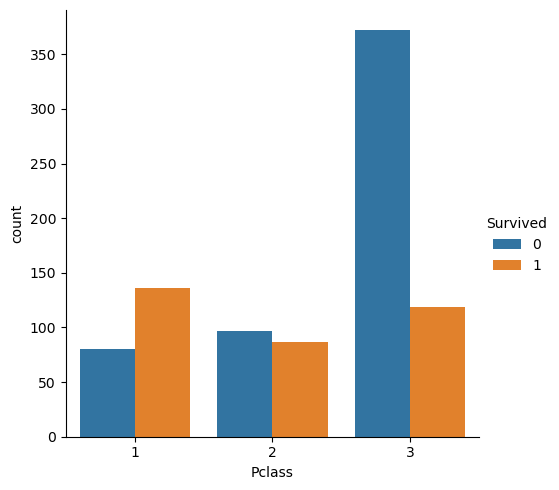

In [10]:
sns.catplot(data=train_full, x="Pclass", hue="Survived", kind="count") #The poor also die more often

c:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


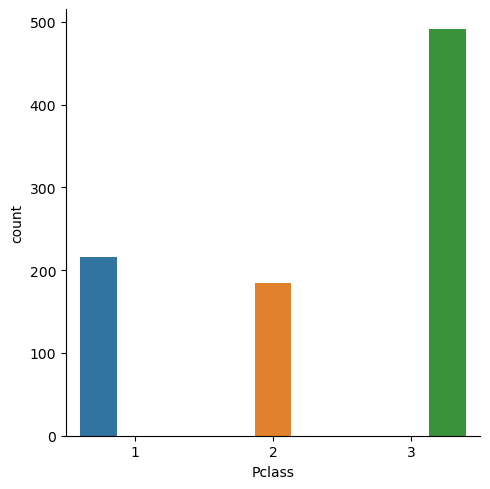

In [11]:
sns.catplot(data=train_full, x="Pclass", hue="Pclass", kind="count") #At the same time, the poor were the most

c:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


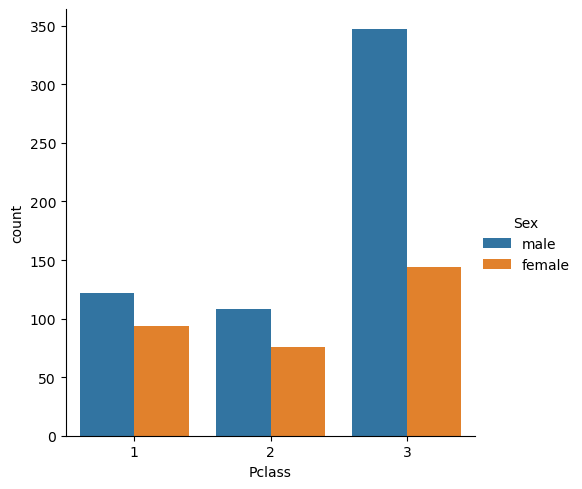

In [12]:
sns.catplot(data=train_full, x="Pclass", hue="Sex", kind="count")  #The poor man were the most

c:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


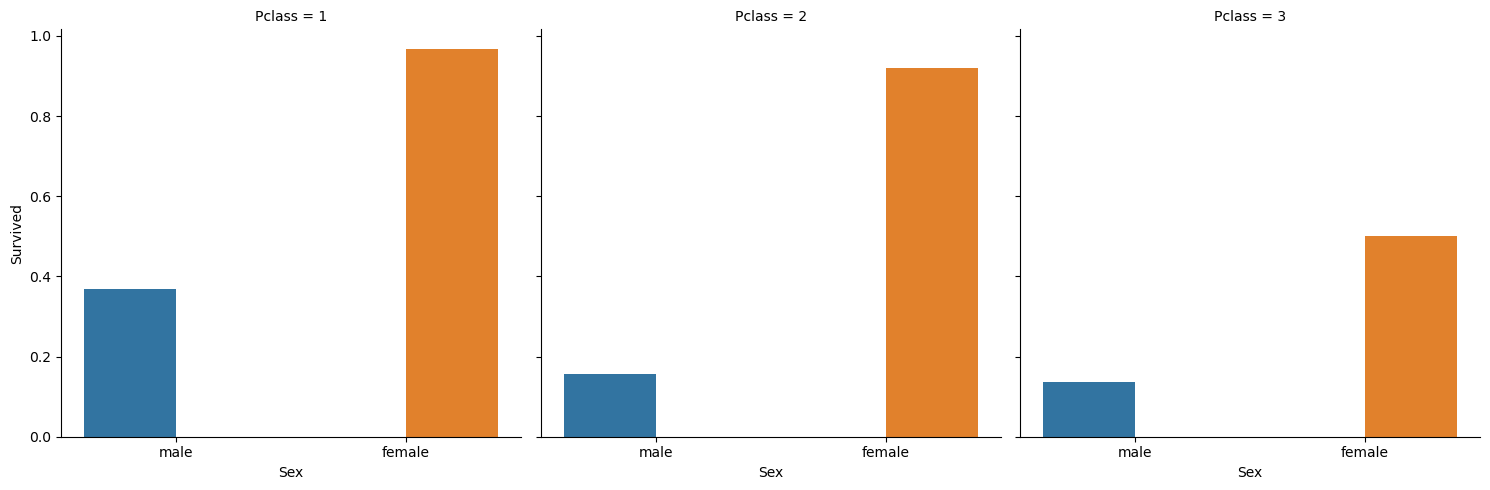

In [13]:
sns.catplot(data=train_full, x="Sex", y="Survived", hue="Sex", col="Pclass", kind="bar", errorbar=None)  #And the dead among them were the most

c:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


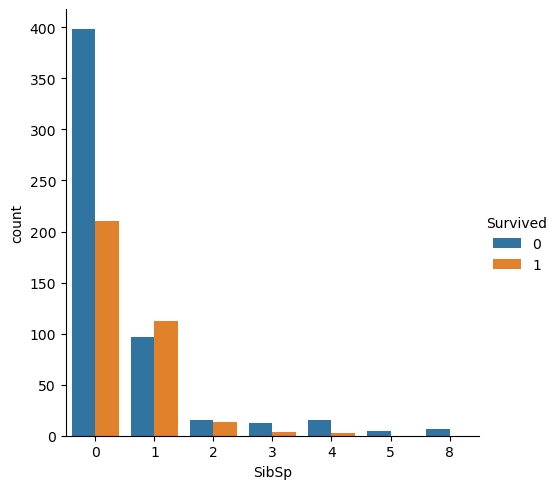

In [14]:
# Survival also depends on the number of families

sns.catplot(data=train_full, x="SibSp", hue="Survived", kind="count") # Here they are siblings/spouses

c:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


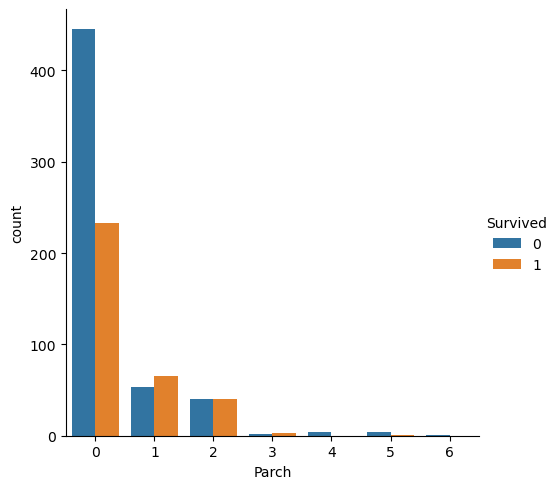

In [15]:
sns.catplot(data=train_full, x="Parch", hue="Survived", kind="count") # Here it's parents/children

c:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


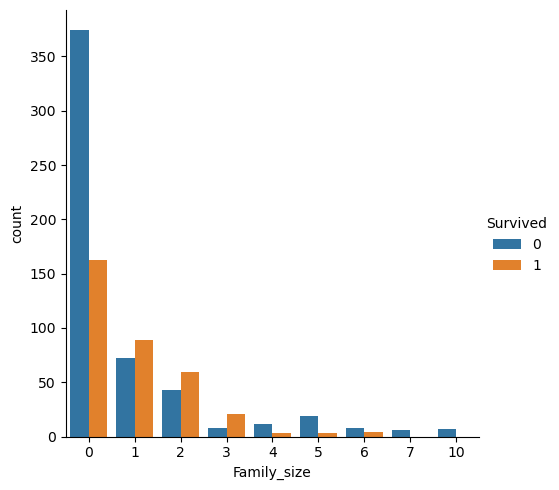

In [16]:
# Feature Engineering "SibSp" and "Parch"

train_full["Family_size"] = train_full["SibSp"] + train_full["Parch"]
test_full["Family_size"] = test_full["SibSp"] + test_full["Parch"]

sns.catplot(data=train_full, x="Family_size", hue="Survived", kind="count")

c:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


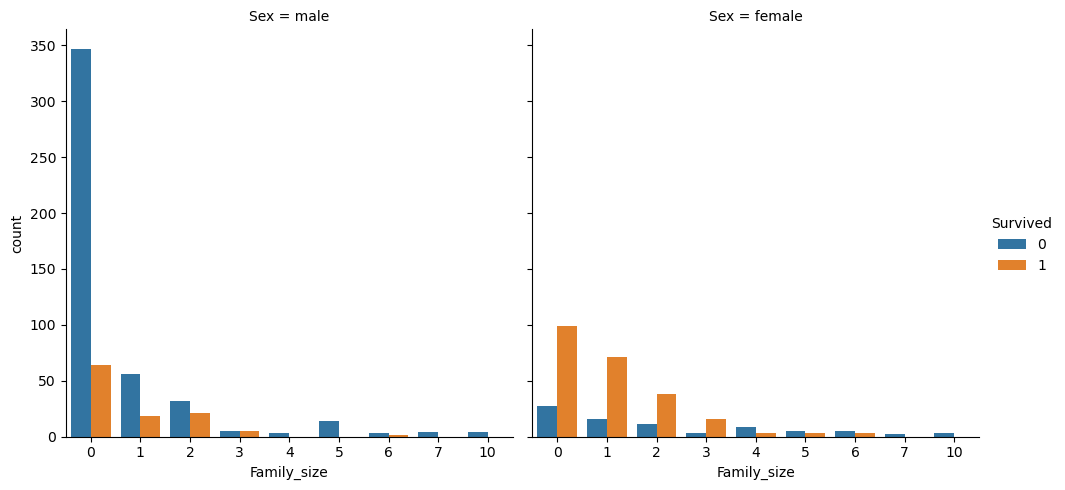

In [17]:
sns.catplot(data=train_full, x="Family_size", hue="Survived", col="Sex", kind="count") # Family_size doesn't affect the survival of men

In [18]:
#Save data

train_full.to_csv("train_inputed")
test_full.to_csv("test_inputed")

In [19]:
# Dicision trump

simple_pred = (~((test_full["Sex"] == "male") & (test_full["Pclass"] == 3))).astype(int).values # Create boolean vector pred
make_prediction_file(simple_pred, test_full, "titanik_simple_baseline.csv")